<a href="https://colab.research.google.com/github/VishruthVS/Image-Processing/blob/main/imageproc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow


image_url = 'https://via.placeholder.com/300.png'  # Sample image URL
image = cv2.imread(image_url)




In [4]:
import cv2
from google.colab.patches import cv2_imshow
import urllib.request


In [6]:
import cv2
import numpy as np  # Adding this line for NumPy
from google.colab.patches import cv2_imshow
import urllib.request


In [7]:
image_url = 'https://via.placeholder.com/300.png'  # Sample image URL
req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1)


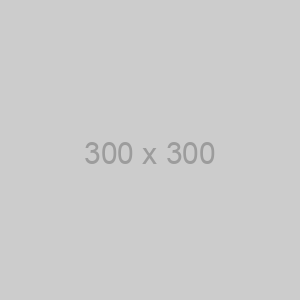

In [10]:
cv2_imshow(image)



In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)


In [11]:
cv2.imwrite('gray_image.png', gray_image)


True

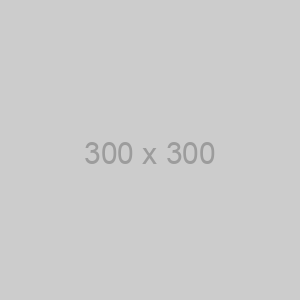

In [12]:
import cv2
from google.colab.patches import cv2_imshow
import urllib.request
import numpy as np

# Load the image from the URL
image_url = 'https://via.placeholder.com/300.png'  # Sample image URL
req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1)

# Ensure the image has been loaded properly
if image is not None:
    cv2_imshow(image)
else:
    print("Image not loaded correctly")


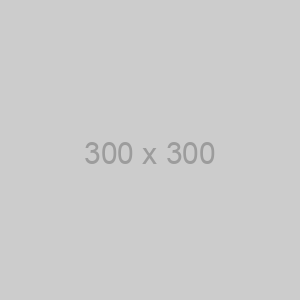

In [13]:
import cv2
from google.colab.patches import cv2_imshow
import urllib.request
import numpy as np

# Load the image from the URL
image_url = 'https://via.placeholder.com/300.png'  # Sample image URL
req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1)

# Ensure the image has been loaded properly
if image is not None:
    cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Convert color space for correct display
else:
    print("Image not loaded correctly")


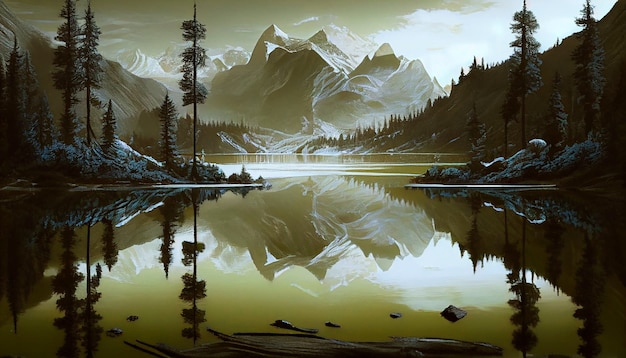

In [15]:
import cv2
from google.colab.patches import cv2_imshow
import urllib.request
import numpy as np

# Load the image from the URL
image_url = 'https://img.freepik.com/free-photo/painting-mountain-lake-with-mountain-background_188544-9126.jpg?size=626&ext=jpg&ga=GA1.1.1826414947.1699660800&semt=sph'  # Sample image URL
req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, cv2.IMREAD_UNCHANGED)

# Ensure the image has been loaded properly
if image is not None:
    cv2_imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert color space for correct display
else:
    print("Image not loaded correctly")



In [16]:
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [17]:
# Prepare the data (only considering 'dogs' as a positive class)
train_dogs = train_images[train_labels.flatten() == 5]  # 5 represents 'dog' class in CIFAR-10
train_not_dogs = train_images[train_labels.flatten() != 5]  # All other classes (including cats)

# Create labels for 'dogs' and 'not dogs'
train_labels_dogs = [1] * len(train_dogs)
train_labels_not_dogs = [0] * len(train_not_dogs)

# Concatenate 'dogs' and 'not dogs' data
final_train_images = np.concatenate((train_dogs, train_not_dogs))
final_train_labels = np.concatenate((train_labels_dogs, train_labels_not_dogs))

# Shuffle the data
from sklearn.utils import shuffle
final_train_images, final_train_labels = shuffle(final_train_images, final_train_labels, random_state=42)


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(final_train_images, final_train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 56s 84ms/step - loss: 0.4742 - accuracy: 0.8969 - val_loss: 0.2505 - val_accuracy: 0.9050
Epoch 2/10
625/625 [==============================] - 53s 86ms/step - loss: 0.2344 - accuracy: 0.9107 - val_loss: 0.2452 - val_accuracy: 0.9098
Epoch 3/10
625/625 [==============================] - 50s 81ms/step - loss: 0.2191 - accuracy: 0.9176 - val_loss: 0.2457 - val_accuracy: 0.9141
Epoch 4/10
625/625 [==============================] - 54s 87ms/step - loss: 0.2061 - accuracy: 0.9221 - val_loss: 0.2319 - val_accuracy: 0.9109
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 0.1947 - accuracy: 0.9272 - val_loss: 0.2195 - val_accuracy: 0.9199
Epoch 6/10
625/625 [==============================] - 52s 84ms/step - loss: 0.1829 - accuracy: 0.9308 - val_loss: 0.2160 - val_accuracy: 0.9179
Epoch 7/10
625/625 [==============================] - 50s 80ms/step - loss: 0.1712 - accuracy: 0.9349 - val_loss: 0.2195 - val_accuracy:

In [19]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels.flatten() == 5)
print(f"Test Accuracy: {test_accuracy}")



313/313 [==============================] - 5s 14ms/step - loss: 0.2380 - accuracy: 0.9055
Test Accuracy: 0.9054999947547913


In [20]:
import cv2
import numpy as np

# Assuming you have your 'new_image' ready, make sure it's preprocessed and formatted appropriately

# Example: Load and preprocess the new image
new_image = cv2.imread('https://img.freepik.com/free-photo/isolated-happy-smiling-dog-white-background-portrait-4_1562-693.jpg?size=626&ext=jpg&ga=GA1.1.1826414947.1699660800&semt=ais')  # Load the image
new_image = cv2.resize(new_image, (32, 32))  # Resize it to match the model input size
new_image = new_image / 255.0  # Normalize the pixel values between 0 and 1
new_image = np.expand_dims(new_image, axis=0)  # Add a batch dimension

# Predict if the new image contains a dog
prediction = model.predict(new_image)

if prediction > 0.5:  # Assuming a threshold of 0.5 for classification
    print("The model predicts this image contains a dog.")
else:
    print("The model predicts this image does not contain a dog.")


error: ignored

In [21]:
import cv2
import numpy as np
import urllib.request

# Fetch the image from the URL
url = 'https://img.freepik.com/free-photo/isolated-happy-smiling-dog-white-background-portrait-4_1562-693.jpg?size=626&ext=jpg&ga=GA1.1.1826414947.1699660800&semt=ais'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
new_image = cv2.imdecode(arr, -1)

# Preprocess the image
new_image = cv2.resize(new_image, (32, 32)) if new_image is not None else None

if new_image is not None:
    new_image = new_image / 255.0  # Normalize the pixel values between 0 and 1
    new_image = np.expand_dims(new_image, axis=0)  # Add a batch dimension

    # Predict if the new image contains a dog
    prediction = model.predict(new_image)

    if prediction > 0.5:  # Assuming a threshold of 0.5 for classification
        print("The model predicts this image contains a dog.")
    else:
        print("The model predicts this image does not contain a dog.")
else:
    print("Error loading the image from the URL.")


1/1 [==============================] - 0s 316ms/step
The model predicts this image does not contain a dog.


In [22]:
import cv2
import numpy as np
import urllib.request

# Fetch the image from the URL
url = 'https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIzLTA3L2FpZ2VuZXJhdGVkLTI0MDcyMy1yYXdwaXhlbF9vZmZpY2VfMTBfY3V0ZV9taW5pbWFsX2dvbGRlbl9yZXRyaWV2ZXJfZG9nX2Rvb2RsZV9ydW5fYzAzNDEwYWQtYjA0OS00NzY4LThlNDctYWE5NWQ2YjVjZGY3LWhxLXNjYWxlLTVfMDB4LmpwZw.jpg'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
new_image = cv2.imdecode(arr, -1)

# Preprocess the image
new_image = cv2.resize(new_image, (32, 32)) if new_image is not None else None

if new_image is not None:
    new_image = new_image / 255.0  # Normalize the pixel values between 0 and 1
    new_image = np.expand_dims(new_image, axis=0)  # Add a batch dimension

    # Predict if the new image contains a dog
    prediction = model.predict(new_image)

    if prediction > 0.5:  # Assuming a threshold of 0.5 for classification
        print("The model predicts this image contains a dog.")
    else:
        print("The model predicts this image does not contain a dog.")
else:
    print("Error loading the image from the URL.")


1/1 [==============================] - 0s 45ms/step
The model predicts this image does not contain a dog.
